<a href="https://colab.research.google.com/github/kiztheflutterer/kiztheflutterer/blob/main/data%20analytics%20BA%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download the 'punkt' resource

df = pd.read_csv('reviews.csv')

# Preprocess the text
# Example for a column 'reviews' that contains the qualitative data
def preprocess_text(reviews):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(reviews.lower())  # Tokenization and lowercasing using reviews parameter
    words = [word for word in words if word.isalpha()]  # Remove punctuation and numbers
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

df['processed_text'] = df['reviews'].apply(preprocess_text) # Apply to the 'reviews' column

# Convert to Document-Term Matrix (Bag of Words)
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['processed_text'])

# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=20, random_state=80)  # Adjust the number of topics
lda.fit(dtm)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Top 20 words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]]) # Use get_feature_names_out() instead of get_feature_names()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 words for topic #0
['lockers', 'airline', 'city', 'seat', 'plane', 'verified', 'passengers', 'cabin', 'london', 'flight', 'mexico', 'crew', 'las', 'food', 'time', 'airways', 'british', 'vegas', 'lucia', 'st']
Top 20 words for topic #1
['phone', 'flights', 'refund', 'check', 'time', 'booked', 'cancelled', 'day', 'airways', 'british', 'london', 'trip', 'service', 'airport', 'hours', 'verified', 'customer', 'told', 'ba', 'flight']
Top 20 words for topic #2
['great', 'return', 'lounge', 'flights', 'boarding', 'excellent', 'trip', 'friendly', 'heathrow', 'london', 'verified', 'staff', 'time', 'food', 'cabin', 'service', 'ba', 'crew', 'good', 'flight']
Top 20 words for topic #3
['airlines', 'premium', 'heathrow', 'staff', 'airline', 'travel', 'booked', 'business', 'hours', 'flights', 'ba', 'verified', 'class', 'economy', 'seat', 'seats', 'london', 'airways', 'british', 'flight']
Top 20 words for topic #4
['cabin', 'hour', 'time', 'coffee', 'crew', 'staff', 'meals', 'service', 'airways

In [ ]:
# Custom topic names
topic_names = {
    0: 'Destinations & Crew',
    1: 'Flight & Customer Service Issues',
    2: 'Positive Flight Experiences',
    3: 'Economy Class Experience',
    4: 'In-Flight Meals & Drinks',
    5: 'Service at Heathrow & London',
    6: 'Business Class Service',
    7: 'Seats & Luggage Problems',
    8: 'Business Class Cabin & Crew',
    9: 'Club Class & Lounge',
    10: 'Cabin Crew & Service',
    11: 'Flight Delays & Communication',
    12: 'Boarding & Lounge Access',
    13: 'Comfortable Flights & Good Service',
    14: 'Seat Reviews (Economy & Club)',
    15: 'Baggage & Trip Reviews',
    16: 'Meal Options & Economy Service',
    17: 'Seats & Service Across Classes',
    18: 'Negative Trip & Baggage Issues',
    19: 'Crew & Passenger Interactions'
}
# Sample topic distribution output from LDA (replace with your actual data)
topic_distribution = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Print topics with custom names
for topic_id in topic_distribution:
    print(f"Topic #{topic_id} is about: {topic_names[topic_id]}")


Topic #0 is about: Destinations & Crew
Topic #1 is about: Flight & Customer Service Issues
Topic #2 is about: Positive Flight Experiences
Topic #3 is about: Economy Class Experience
Topic #4 is about: In-Flight Meals & Drinks
Topic #5 is about: Service at Heathrow & London
Topic #6 is about: Business Class Service
Topic #7 is about: Seats & Luggage Problems
Topic #8 is about: Business Class Cabin & Crew
Topic #9 is about: Club Class & Lounge
Topic #10 is about: Cabin Crew & Service
Topic #11 is about: Flight Delays & Communication
Topic #12 is about: Boarding & Lounge Access
Topic #13 is about: Comfortable Flights & Good Service
Topic #14 is about: Seat Reviews (Economy & Club)
Topic #15 is about: Baggage & Trip Reviews
Topic #16 is about: Meal Options & Economy Service
Topic #17 is about: Seats & Service Across Classes
Topic #18 is about: Negative Trip & Baggage Issues
Topic #19 is about: Crew & Passenger Interactions


In [ ]:
from textblob import TextBlob

# Assuming you have 'df', 'lda', and 'dtm' from your previous code

# Calculate sentiment for each review
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Get topic probabilities for each document
topic_probs = lda.transform(dtm)

# Get dominant topic for each document
df['dominant_topic'] = topic_probs.argmax(axis=1)

# Analyze sentiment by topic
for topic_num in range(lda.n_components):
    topic_reviews = df[df['dominant_topic'] == topic_num]
    avg_sentiment = topic_reviews['sentiment'].mean()
    print(f"Average sentiment for Topic #{topic_num}: {avg_sentiment:.2f}")

Average sentiment for Topic #0: 0.11
Average sentiment for Topic #1: 0.00
Average sentiment for Topic #2: 0.25
Average sentiment for Topic #3: 0.01
Average sentiment for Topic #4: 0.03
Average sentiment for Topic #5: 0.08
Average sentiment for Topic #6: 0.01
Average sentiment for Topic #7: 0.02
Average sentiment for Topic #8: 0.06
Average sentiment for Topic #9: 0.09
Average sentiment for Topic #10: 0.02
Average sentiment for Topic #11: 0.03
Average sentiment for Topic #12: 0.17
Average sentiment for Topic #13: 0.24
Average sentiment for Topic #14: 0.15
Average sentiment for Topic #15: -0.01
Average sentiment for Topic #16: 0.02
Average sentiment for Topic #17: -0.01
Average sentiment for Topic #18: 0.04
Average sentiment for Topic #19: 0.02


In [ ]:

average_sentiments = [0.11, 0.00, 0.25, 0.01, 0.03, 0.08, 0.01, 0.02, 0.06, 0.09,
                      0.02, 0.03, 0.17, 0.24, 0.15, -0.01, 0.02, -0.01, 0.04, 0.02]

# Classify topics as positive, negative, or neutral
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification
topic_classification = [classify_sentiment(score) for score in average_sentiments]

# Print the result
for i, classification in enumerate(topic_classification):
    print(f"Topic #{i}: {classification}")


Topic #0: Positive
Topic #1: Neutral
Topic #2: Positive
Topic #3: Neutral
Topic #4: Neutral
Topic #5: Neutral
Topic #6: Neutral
Topic #7: Neutral
Topic #8: Neutral
Topic #9: Neutral
Topic #10: Neutral
Topic #11: Neutral
Topic #12: Positive
Topic #13: Positive
Topic #14: Positive
Topic #15: Neutral
Topic #16: Neutral
Topic #17: Neutral
Topic #18: Neutral
Topic #19: Neutral


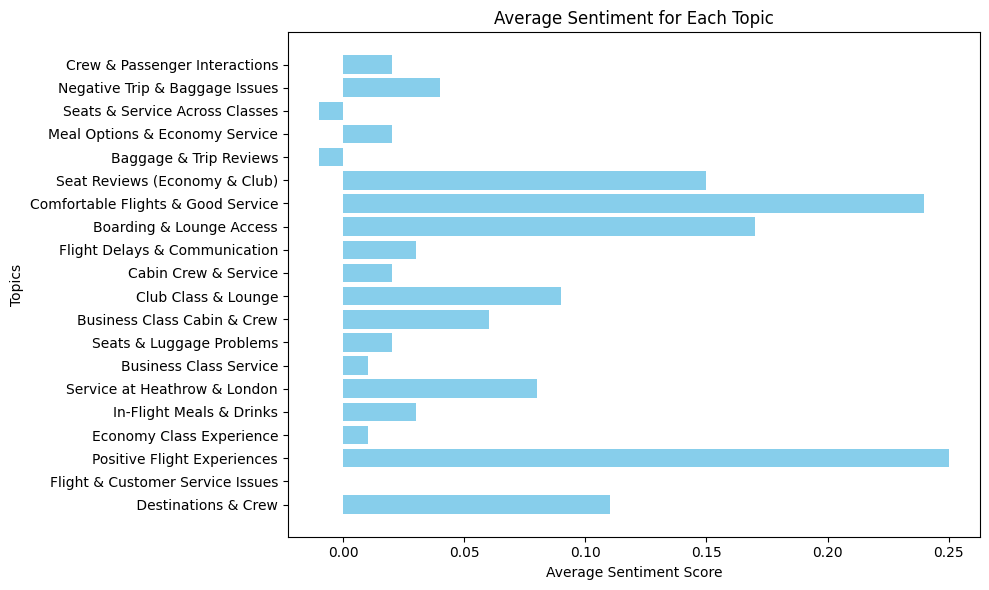

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Example sentiment scores and corresponding topic names (you can replace these with your actual data)
topic_names = [ ' Destinations & Crew','Flight & Customer Service Issues',
     'Positive Flight Experiences',
     'Economy Class Experience',
     'In-Flight Meals & Drinks',
     'Service at Heathrow & London',
     'Business Class Service',
     'Seats & Luggage Problems',
     'Business Class Cabin & Crew',
   'Club Class & Lounge',
    'Cabin Crew & Service',
    'Flight Delays & Communication',
    'Boarding & Lounge Access',
    'Comfortable Flights & Good Service',
    'Seat Reviews (Economy & Club)',
    'Baggage & Trip Reviews',
    'Meal Options & Economy Service',
    'Seats & Service Across Classes',
    'Negative Trip & Baggage Issues',
    'Crew & Passenger Interactions' ]


average_sentiments = [0.11, 0.00, 0.25, 0.01, 0.03, 0.08, 0.01, 0.02, 0.06, 0.09,
                      0.02, 0.03, 0.17, 0.24, 0.15, -0.01, 0.02, -0.01, 0.04, 0.02]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(topic_names, average_sentiments, color='skyblue')

# Add titles and labels
plt.xlabel('Average Sentiment Score')
plt.ylabel('Topics')
plt.title('Average Sentiment for Each Topic')

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('sentiment_analysis_plot.png')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


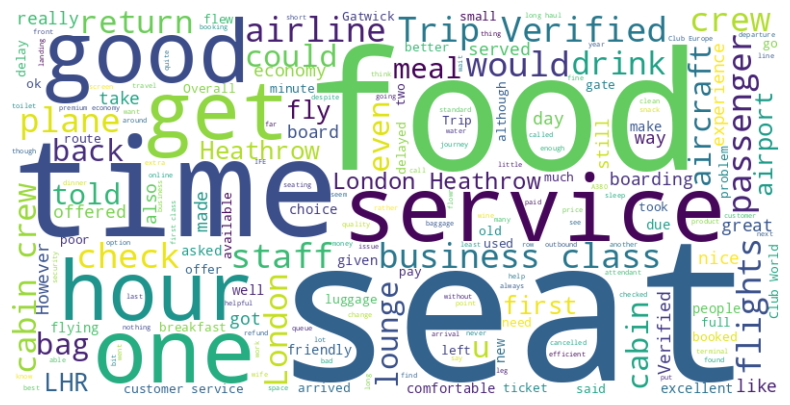

<Figure size 640x480 with 0 Axes>

In [ ]:
from nltk.corpus import stopwords

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the CSV file
df = pd.read_csv('reviews.csv')

# Combine all reviews into a single text
text = ' '.join(review for review in df['reviews'])

# Get the default English stopwords
stop_words = set(stopwords.words('english'))

# Add your custom stopwords (e.g., 'review', 'product', etc.)
custom_stopwords = {'review', 'ba', 'british', 'airways', 'use', 'flight' }  # Add any words you want to exclude
stop_words.update(custom_stopwords)
# Create the word cloud object
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.savefig('wordcloud_image1.png')




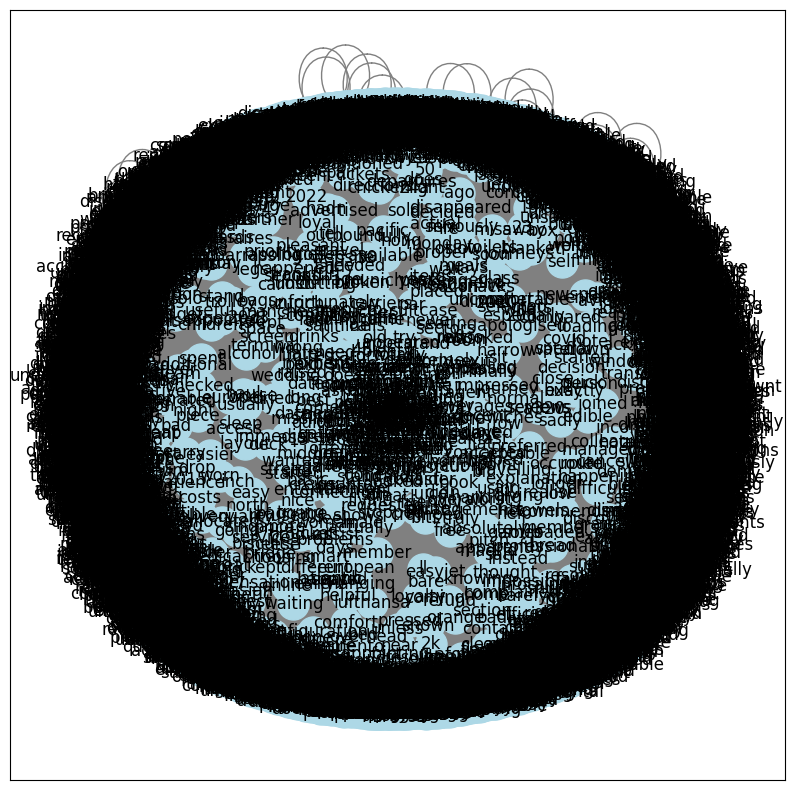

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data into bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Get bigram counts and names
bigrams = X.toarray().sum(axis=0)
bigram_names = vectorizer.get_feature_names_out()

# Create a graph from bigrams
G = nx.Graph()
for i, bigram in enumerate(bigram_names):
    word1, word2 = bigram.split()
    G.add_edge(word1, word2, weight=bigrams[i])

# Plot the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=1)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

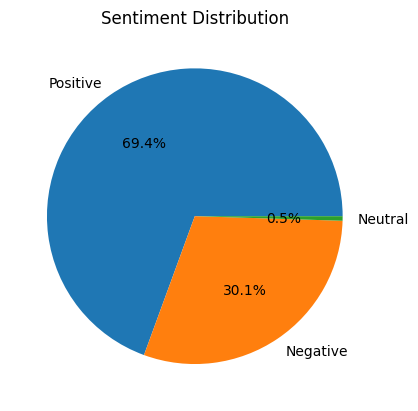

<Figure size 640x480 with 0 Axes>

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to categorize sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review
df['Sentiment'] = df['reviews'].apply(get_sentiment)

# Plot pie chart of sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

plt.savefig('sentiment_pie_chart.png')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airways', 'british'] not in stop_words.
  warnings.warn(


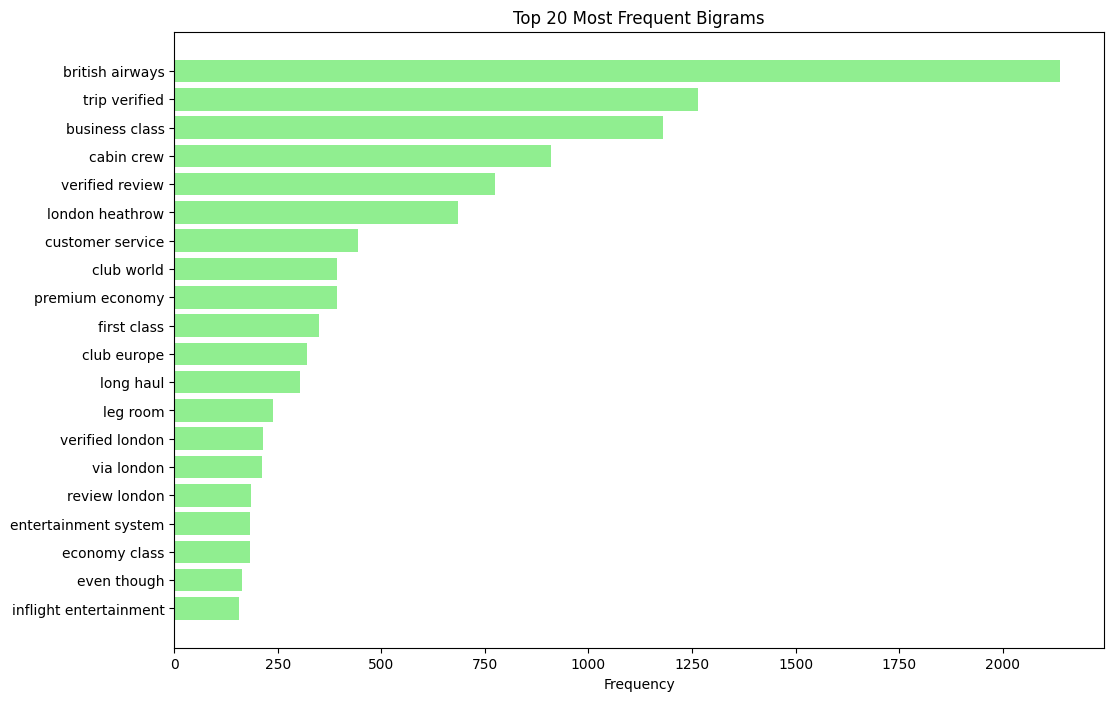

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords # import the stopwords module

# Load the review data from CSV
df = pd.read_csv('reviews.csv')

# Create a CountVectorizer for extracting bigrams (2-word phrases)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Create a list of custom stopwords
custom_stopwords = ['ba', 'british airways', 'use', 'flight']

# Get the default English stopwords as a list
stop_words = stopwords.words('english')

# Add custom stopwords to the list
stop_words.extend(custom_stopwords)

# Set the stop words for the vectorizer
vectorizer.set_params(stop_words=stop_words)

# Fit the vectorizer on the 'Reviews' column
X = vectorizer.fit_transform(df['reviews'])

# Get the bigram counts and names
bigrams = X.toarray().sum(axis=0)
bigram_names = vectorizer.get_feature_names_out()

# Create a DataFrame with bigrams and their corresponding counts
bigram_df = pd.DataFrame(list(zip(bigram_names, bigrams)), columns=['Bigram', 'Count'])

# Sort by most frequent bigrams
bigram_df = bigram_df.sort_values(by='Count', ascending=False)

# Select the top 20 bigrams
top_20_bigrams = bigram_df.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size for more bars
plt.barh(top_20_bigrams['Bigram'], top_20_bigrams['Count'], color='lightgreen')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams')
plt.gca().invert_yaxis()  # Invert the y-axis to display the largest on top
plt.show()

# Save the plot
plt.savefig('top_20_bigrams.png')

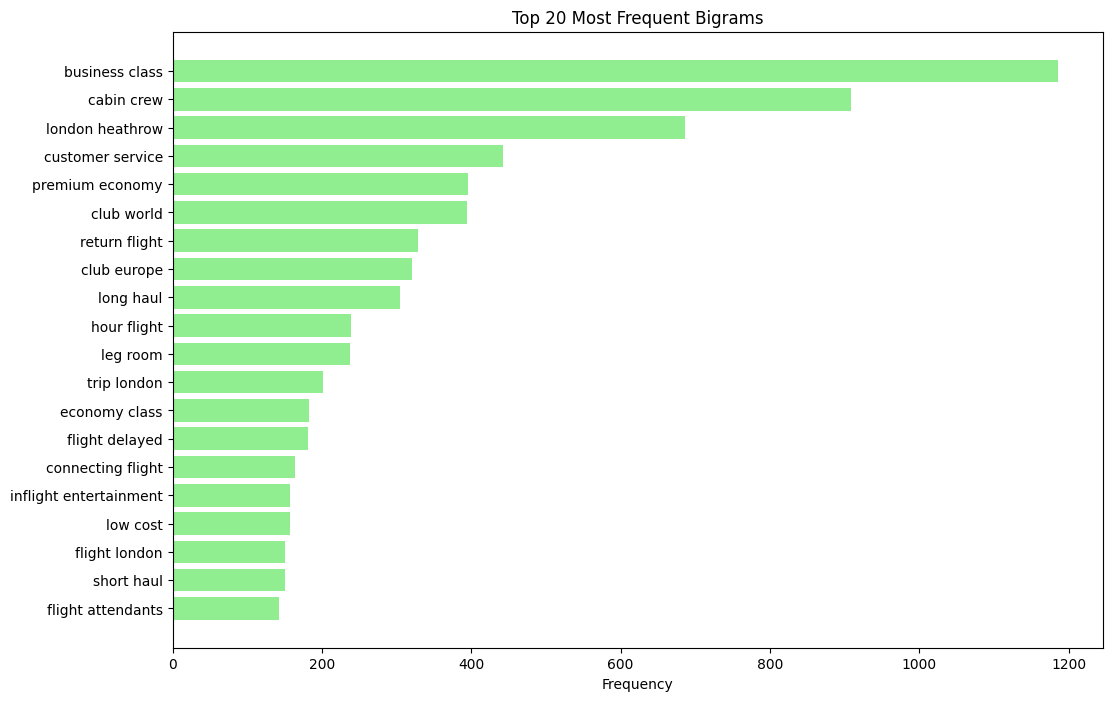

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the review data from CSV
df = pd.read_csv('reviews.csv')

# Preprocess the 'Reviews' column (lowercase, strip spaces)
df['reviews'] = df['reviews'].str.lower().str.strip()

# Define your custom stopwords list
custom_stopwords = ['british', 'airways', 'ba', 'verified', 'review']  # Remove leading spaces

# Convert the built-in English stopwords to a list
default_stopwords = list(ENGLISH_STOP_WORDS)

# Ensure the custom stopwords are lowercase and stripped of spaces
custom_stopwords = [word.lower().strip() for word in custom_stopwords]

# Combine default stopwords with custom stopwords
combined_stopwords = default_stopwords + custom_stopwords

# Create a CountVectorizer for extracting bigrams (2-word phrases), including custom stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=combined_stopwords)

# Fit the vectorizer on the 'Reviews' column
X = vectorizer.fit_transform(df['reviews'])

# Get the bigram counts and names
bigrams = X.toarray().sum(axis=0)
bigram_names = vectorizer.get_feature_names_out()

# Create a DataFrame with bigrams and their corresponding counts
bigram_df = pd.DataFrame(list(zip(bigram_names, bigrams)), columns=['Bigram', 'Count'])

# Sort by most frequent bigrams
bigram_df = bigram_df.sort_values(by='Count', ascending=False)

# Select the top 20 bigrams
top_20_bigrams = bigram_df.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size for more bars
plt.barh(top_20_bigrams['Bigram'], top_20_bigrams['Count'], color='lightgreen')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams')
plt.gca().invert_yaxis()  # Invert the y-axis to display the largest on top
plt.show()

# Save the plot
plt.savefig('top_20_bigrams.png')
